In [2]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import json

%matplotlib inline
%load_ext autoreload
%autoreload 2


In [3]:
from loaddata import loaddets, loaddata, load_merged

In [4]:
TRAIN_DATA_PATH = 'train/'
TEST_DATA_PATH = 'test/'

train_jpeg = glob.glob(TRAIN_DATA_PATH + '*')
test_jpeg = glob.glob(TEST_DATA_PATH + '*')

print("number of train jpeg data:", len(train_jpeg))
print("number of test jpeg data:", len(test_jpeg))

number of train jpeg data: 203315
number of test jpeg data: 60214


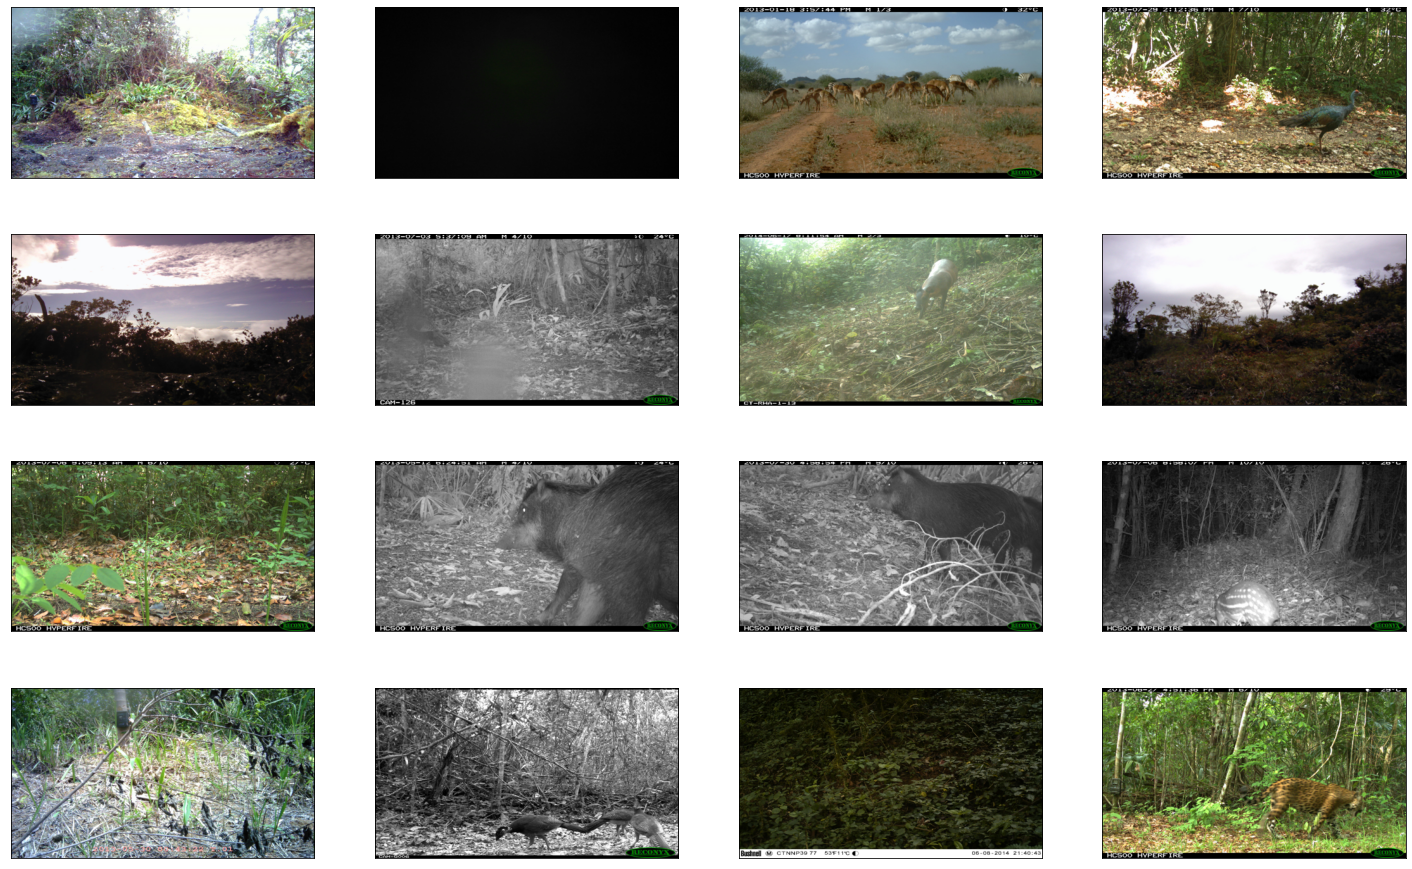

In [5]:
fig = plt.figure(figsize=(25, 16))
for i,im_path in enumerate(train_jpeg[:16]):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    im = Image.open(im_path)
    im = im.resize((480,270))
    plt.imshow(im)

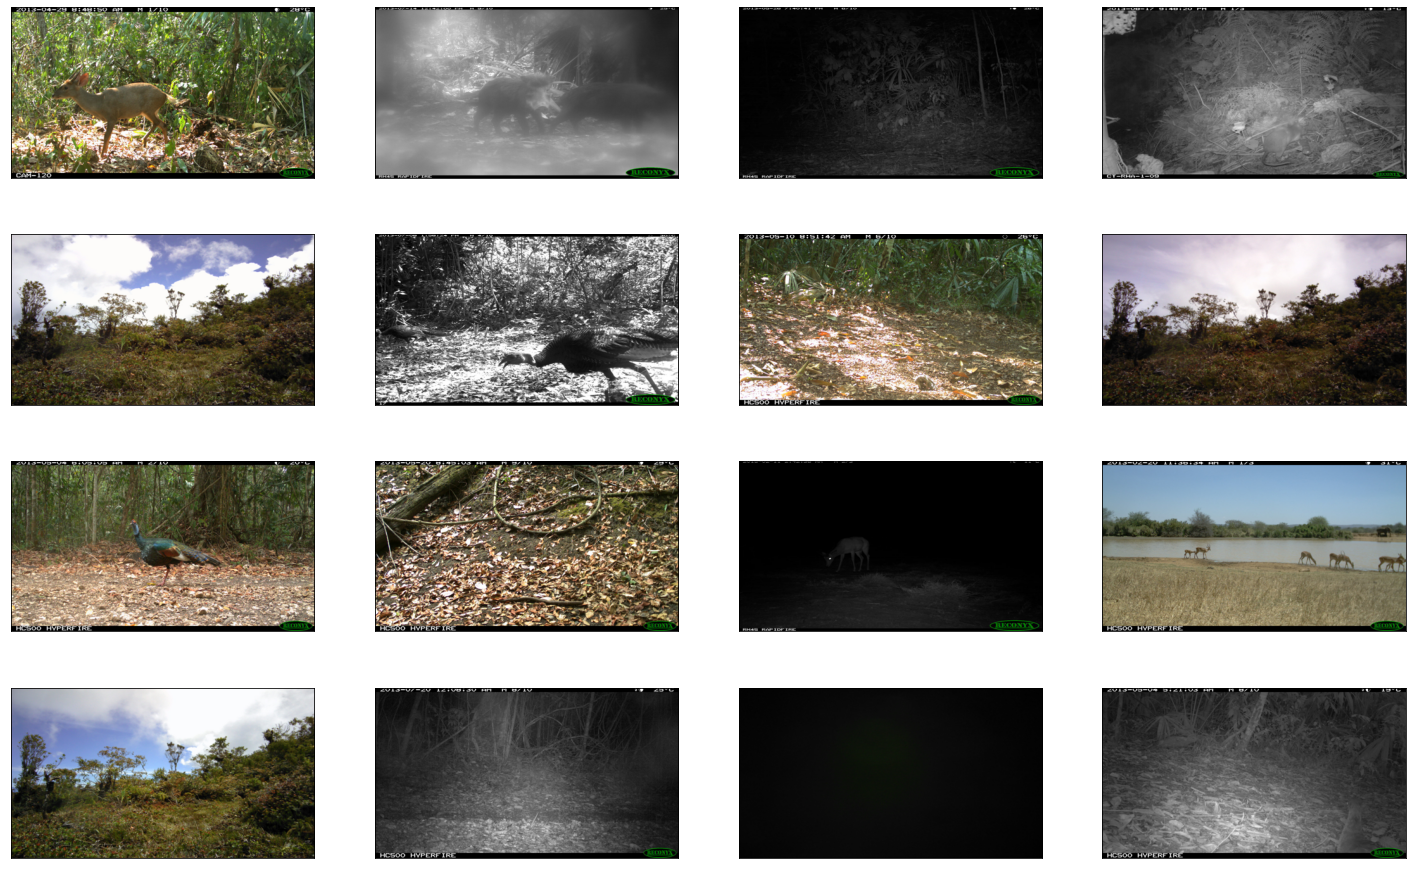

In [5]:
fig = plt.figure(figsize=(25, 16))
for i,im_path in enumerate(train_jpeg[16:32]):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    im = Image.open(im_path)
    im = im.resize((480,270))
    plt.imshow(im)

# TestData

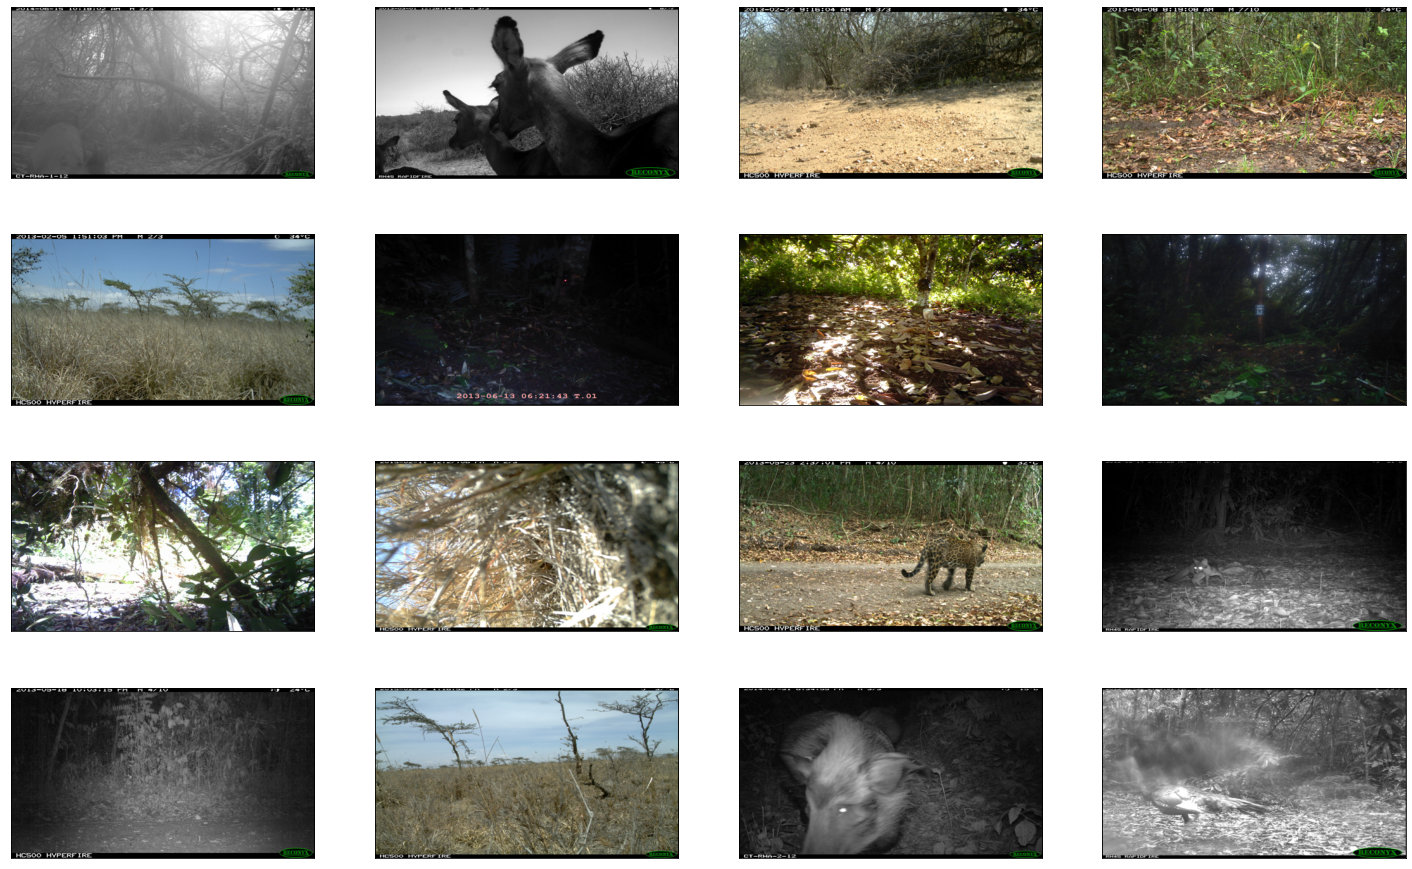

In [6]:
fig = plt.figure(figsize=(25, 16))
for i,im_path in enumerate(test_jpeg[:16]):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    im = Image.open(im_path)
    im = im.resize((480,270))
    plt.imshow(im)

In [7]:
sub = pd.read_csv("sample_submission.csv")
sub.head()

Id  Predicted2  Predicted3  Predicted4  \
0  32ce8026-7ec9-11eb-b675-4f3cc0c82eb3           4           2           8   
1  945c6602-21bc-11ea-a13a-137349068a90           2           5           5   
2  a91c7e26-0cd3-11eb-bed1-0242ac1c0002           0           0           3   
3  9926239e-21bc-11ea-a13a-137349068a90           6           9           4   
4  9672184c-21bc-11ea-a13a-137349068a90           4           1           5   

   Predicted6  Predicted7  Predicted8  Predicted9  Predicted10  Predicted12  \
0           3           6           6           6            3            6   
1           8           5           4           2            3            1   
2           5           8           3           5            4            6   
3           5           1           5           3            1            9   
4           8           8           4           1            7            1   

   ...  Predicted559  Predicted562  Predicted563  Predicted564  Predicted565  \
0  ...             6             4             1             0             9   
1  ...             0             8             4             3             9   
2  ...             2             3             9             6             3   
3  ...             6             0             5             1             9   
4  ...             2             4             3             2             0   

   Predicted566  Predicted567  Predicted568  Predicted570  Predicted571  
0             5             5             1             5             8  
1             1             6             7             2             4  
2             7             9             2             6             5  
3             0             4             9             7             7  
4             6             5             3             9             3  

[5 rows x 205 columns]

In [8]:
sub.shape

(11057, 205)

In [9]:
df_anno, df_categories, df_images = loaddata()

ValueError: num must be 1 <= num <= 12, not 13

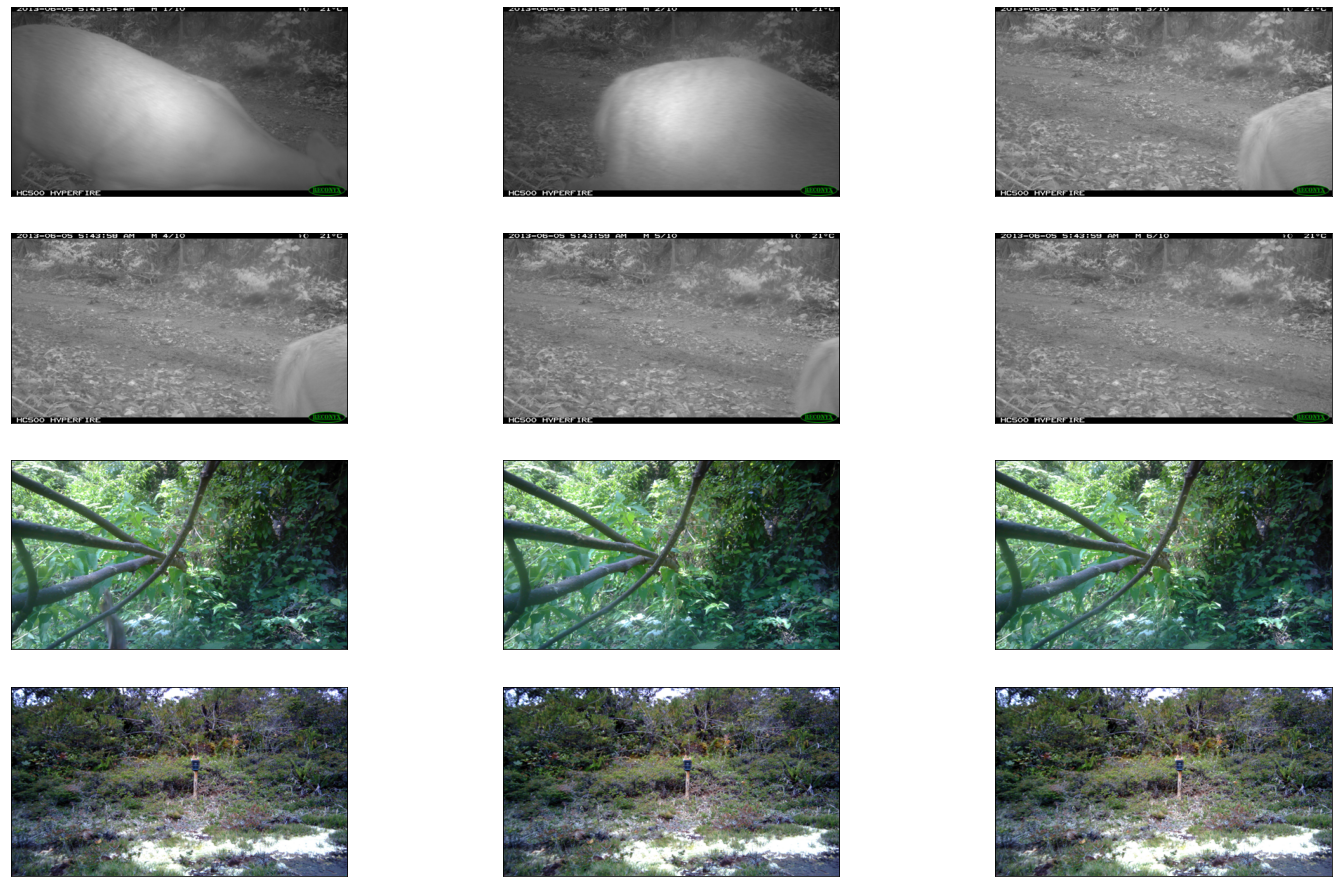

In [15]:
train_images_seq = [(TRAIN_DATA_PATH+item["image_id"]+'.jpg') for _,item in df_images.iterrows()]
img_array = []
size = (480,270)

fig = plt.figure(figsize=(25, 16))
for i,im_path in enumerate(train_images_seq):
    ax = fig.add_subplot(4, 3, i+1, xticks=[], yticks=[])
    im = Image.open(im_path)
    im = im.resize(size)
    plt.imshow(im)
    
    img_array.append(im)

In [ ]:
df_categories = pd.DataFrame.from_records(train_annotations["categories"])
df_categories.to_excel("species.xlsx")

In [ ]:
train_annotations["annotations"][:10]

In [ ]:
train_annotated_category = set([ annotation["category_id"] for annotation in train_annotations["annotations"]])
len(train_annotated_category)

In [ ]:
with open('metadata/iwildcam2021_test_information.json', encoding='utf-8') as json_file:
    test_information =json.load(json_file)
    
test_information.keys()

In [ ]:
test_information['images'][:5]

In [ ]:
with open('metadata/iwildcam2021_megadetector_results.json', encoding='utf-8') as json_file:
    megadetector_results =json.load(json_file)
    
megadetector_results.keys()

In [ ]:
megadetector_results_df = pd.DataFrame(megadetector_results["images"])
megadetector_results_df.head()

In [1]:
print(f"There are {len(megadetector_results_df)} detection data.")

NameError: name 'megadetector_results_df' is not defined

In [ ]:
megadetector_results_df.iloc[100]["detections"]


In [ ]:
#Refered: https://www.kaggle.com/qinhui1999/how-to-use-bbox-for-iwildcam-2020 

def draw_bboxs(detections_list, im):
    """
    detections_list: list of set includes bbox.
    im: image read by Pillow.
    """
    
    for detection in detections_list:
        x1, y1,w_box, h_box = detection["bbox"]
        ymin,xmin,ymax, xmax=y1, x1, y1 + h_box, x1 + w_box
        draw = ImageDraw.Draw(im)
        
        imageWidth=im.size[0]
        imageHeight= im.size[1]
        (left, right, top, bottom) = (xmin * imageWidth, xmax * imageWidth,
                                      ymin * imageHeight, ymax * imageHeight)
        
        draw.line([(left, top), (left, bottom), (right, bottom),
               (right, top), (left, top)], width=4, fill='Red')


In [ ]:
# Let's see 100th data of train dataset.
data_index = 100

# Load 100th image data. 
im = Image.open("train/" + megadetector_results_df.loc[data_index]['id'] + ".jpg")
im = im.resize((480,270))

# Overwrite bbox
draw_bboxs(megadetector_results_df.loc[data_index]['detections'], im)

# Show
plt.imshow(im)
plt.title(f"image {data_index} with bbox")

In [ ]:
from PIL import ImageDraw

In [ ]:
megadetector_results_df.loc[data_index]['detections'][0]["bbox"]


In [ ]:
def get_crop_area(bbox, image_size):
    x1, y1,w_box, h_box = bbox
    ymin,xmin,ymax, xmax = y1, x1, y1 + h_box, x1 + w_box
    area = (xmin * image_size[0], ymin * image_size[1], 
            xmax * image_size[0], ymax * image_size[1])
    return area

crop_area = get_crop_area(megadetector_results_df.loc[data_index]['detections'][0]["bbox"], im.size)
im_croped = im.crop(crop_area)
plt.imshow(im_croped)

In [ ]:
megadetector_results["info"]

In [ ]:
megadetector_results["detection_categories"]

In [ ]:
import collections
import seaborn as sns

In [ ]:
# Preperation for isualization
df_categories = pd.DataFrame(train_annotations["categories"])
labels_id = [item["id"] for item in train_annotations["categories"]]
cnt = collections.Counter([item["category_id"] for item in train_annotations["annotations"]])
df_categories_count = pd.DataFrame.from_dict(cnt, orient='index').reset_index()
df_categories_count = df_categories_count.rename(columns={'index':'id', 0:'count'})

df_categories_count = df_categories_count.merge(df_categories, on='id').sort_values(by=['count'], ascending=False)


In [ ]:
df_categories_count.head()
df_categories_count.to_excel('sorteerd.xlsx')


In [ ]:
fig = plt.figure(figsize=(30, 4))
ax = sns.barplot(x="id", y="count",data=df_categories_count, order=labels_id)
ax.set(ylabel='count')
ax.set(ylim=(0,80000))
plt.title('distribution of count per id in train')

In [ ]:
df_categories_count.iloc[:10]

In [ ]:
df_categories_count[df_categories_count["count"] == 1]

In [17]:
merged = load_merged()
merged.head()

id                              image_id  \
0  a292dd3c-21bc-11ea-a13a-137349068a90  96b00332-21bc-11ea-a13a-137349068a90   
1  9b075d72-21bc-11ea-a13a-137349068a90  973073b4-21bc-11ea-a13a-137349068a90   
2  a0d6f7b2-21bc-11ea-a13a-137349068a90  89588844-21bc-11ea-a13a-137349068a90   
3  a2097290-21bc-11ea-a13a-137349068a90  87dc5806-21bc-11ea-a13a-137349068a90   
4  9a4c7b1a-21bc-11ea-a13a-137349068a90  96960680-21bc-11ea-a13a-137349068a90   

   category_id         name  seq_num_frames  location  \
0           73  canis lupus               1       267   
1           73  canis lupus               3       521   
2           73  canis lupus               3       521   
3           73  canis lupus               3       521   
4           73  canis lupus               3       140   

                  datetime                                seq_id  width  \
0  2013-08-08 11:45:00.000  96b004ea-21bc-11ea-a13a-137349068a90   1795   
1  2014-06-23 17:16:00.000  97307576-21bc-11ea-a13a-137349068a90   2048   
2  2014-06-23 17:16:00.000  97307576-21bc-11ea-a13a-137349068a90   2048   
3  2014-06-23 17:16:01.000  97307576-21bc-11ea-a13a-137349068a90   2048   
4  2015-02-12 10:10:05.000  974c0124-21bc-11ea-a13a-137349068a90   1280   

   height                                 file_name  sub_location  \
0    1222  96b00332-21bc-11ea-a13a-137349068a90.jpg           NaN   
1    1536  973073b4-21bc-11ea-a13a-137349068a90.jpg           NaN   
2    1536  89588844-21bc-11ea-a13a-137349068a90.jpg           NaN   
3    1536  87dc5806-21bc-11ea-a13a-137349068a90.jpg           NaN   
4     720  96960680-21bc-11ea-a13a-137349068a90.jpg           NaN   

   seq_frame_num                                         detections  \
0              0  [{'category': '1', 'bbox': [0.4005, 0.6587, 0....   
1              0  [{'category': '1', 'bbox': [0.4144, 0.1232, 0....   
2              1  [{'category': '1', 'bbox': [0.1791, 0.0985, 0....   
3              2  [{'category': '1', 'bbox': [0.0439, 0.0355, 0....   
4              0  [{'category': '1', 'bbox': [0.3808, 0.4022, 0....   

   max_detection_conf  
0               0.995  
1               1.000  
2               1.000  
3               1.000  
4               1.000

In [32]:
merged.groupby('seq_id').size().values()

TypeError: 'numpy.ndarray' object is not callable